# Following Along YouTube Tutorial

In [14]:
# Import 

import tensorflow
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras  import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from keras.utils import to_categorical, normalize

In [15]:
# Create our dataset.

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [16]:
# Normalize the data

x_train = normalize(x_train, axis = 1)
x_test = normalize(x_test, axis = 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
# Create a model

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Dense(10))
model.add(Activation('softmax'))

In [18]:
# Summary.

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
__________________________________________________

In [20]:
# Compile the model.

model.compile(
loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics = ['accuracy']

)

In [21]:
# Fit the model to some data.

history = model.fit(
x_train,
y_train,
epochs= 10,
batch_size=32,
validation_split=0.1,
verbose = 1,
shuffle=True
)

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4574 - accuracy: 0.8705 - val_loss: 0.1218 - val_accuracy: 0.9630
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1073 - accuracy: 0.9669 - val_loss: 0.0920 - val_accuracy: 0.9685
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0693 - accuracy: 0.9779 - val_loss: 0.0961 - val_accuracy: 0.9705
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0500 - accuracy: 0.9837 - val_loss: 0.0880 - val_accuracy: 0.9730
Epoch 5/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0388 - accuracy: 0.9874 - val_loss: 0.0900 - val_accuracy: 0.9752
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0273 - accuracy: 0.9908 - val_loss: 0.1029 - val_accuracy: 0.9732
Epoch 7/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0232 - accuracy: 0.9921 - val_loss: 0.1020 - val_accuracy:

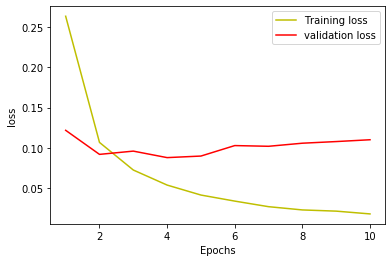

In [25]:
# Plot to see how the model did in terms of loss.

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

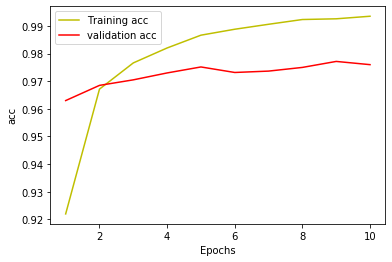

In [33]:
# Plot to see how the model did in terms of Acc.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [34]:
# See how it does based on predictions.

test_loss, test_acc = model.evaluate(x_test,y_test)
test_acc

313/313 [==============================] - 0s 1ms/step - loss: 0.1400 - accuracy: 0.9717


0.9717000126838684

In [35]:
# Now we create the model with dropout layer. 

model_dropout = Sequential()
model_dropout.add(Flatten(input_shape=(28,28)))
model_dropout.add(Dense(128))
model_dropout.add(Dropout(0.5))
model_dropout.add(Activation('relu'))
model_dropout.add(Dense(128))
model_dropout.add(Dropout(0.5))
model_dropout.add(Activation('relu'))
model_dropout.add(Dense(10))
model_dropout.add(Activation('softmax'))

In [36]:
# Get the summary.

model_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_3 (Activation)    (None, 128)              

In [37]:
# Compile the new model

model_dropout.compile(
loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics = ['accuracy']
)

In [39]:
# Fit the model to some data.

history_dropout = model_dropout.fit(
x_train,
y_train,
epochs= 10,
batch_size=32,
validation_split=0.1,
verbose = 1,
shuffle=True
)

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1402 - accuracy: 0.9583 - val_loss: 0.0807 - val_accuracy: 0.9773
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1382 - accuracy: 0.9589 - val_loss: 0.0844 - val_accuracy: 0.9768
Epoch 3/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1348 - accuracy: 0.9602 - val_loss: 0.0817 - val_accuracy: 0.9773
Epoch 4/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1313 - accuracy: 0.9602 - val_loss: 0.0806 - val_accuracy: 0.9773
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1276 - accuracy: 0.9609 - val_loss: 0.0763 - val_accuracy: 0.9788
Epoch 6/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1229 - accuracy: 0.9635 - val_loss: 0.0807 - val_accuracy: 0.9780
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1221 - accuracy: 0.9634 - val_loss: 0.0803 - val_accuracy:

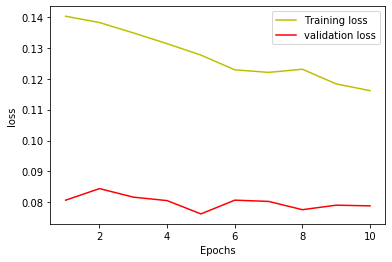

In [40]:
# Plot to see how the model did in terms of loss.

loss = history_dropout.history['loss']
val_loss = history_dropout.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

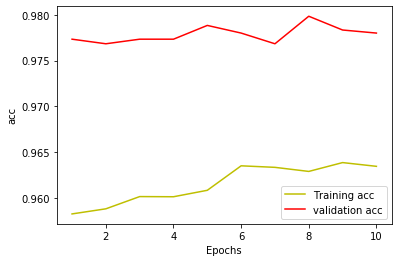

In [41]:
# Plot to see how the model did in terms of Acc.

acc = history_dropout.history['accuracy']
val_acc = history_dropout.history['val_accuracy']
plt.plot(epochs, acc, 'y', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()